# Импорт библиотек и загрузка данных

In [34]:
# Импорт основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Для автопрофилирования данных (EDA)
from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

from lazypredict.Supervised import LazyClassifier

import shap
import lime
import lime.lime_tabular

import lightgbm as lgb

# Отображение графиков внутри ноутбука
%matplotlib inline

# Установка стиля графиков
sns.set(style="whitegrid", font_scale=1.1)

In [5]:
df = pd.read_csv('Dataset_2_DATA.csv')

print('Размер датасета:', df.shape)
display(df.head())

Размер датасета: (7310, 56)


HHID      PERSID     VPLID       RitID  HH_VALID  P_VALID  KHVM  \
0  30055622  3005562201  13957101  1395710101         2        3     2   
1  30055622  3005562201  13957102  1395710201         2        3     2   
2  30055622  3005562201  13957201  1395720101         2        3     1   
3  30055622  3005562201  13957202  1395720201         2        3     1   
4  30204076  3020407601  14445303  1444530301         2        3     8   

   WEGGEWEEST  VERTREKP  AANTVPL  ...  HHAUTO_N  HHAUTO  HHBESTEL  HHHYBRID  \
0           1         2        2  ...         3       1         0         0   
1           1         2        2  ...         3       1         0         0   
2           1         2        4  ...         3       1         0         0   
3           1         2        4  ...         3       1         0         0   
4           1         1        3  ...         2       1         1         0   

   HHMOTOR  HHBROM  HHSNOR  HHFIETS  HHVOUWFIETS  HHEBIKE  
0        1       0       0        1            0        1  
1        1       0       0        1            0        1  
2        1       0       0        1            0        1  
3        1       0       0        1            0        1  
4        1       0       0        1            0        1  

[5 rows x 56 columns]

# EDA

In [6]:
# Оценка пропусков и базовой статистики
print('Пропуски по столбцам:')
display(df.isnull().sum())
display(df.describe())

Пропуски по столбцам:


HHID                       0
PERSID                     0
VPLID                      0
RitID                      0
HH_VALID                   0
P_VALID                    0
KHVM                       0
WEGGEWEEST                 0
VERTREKP                   0
AANTVPL                    0
VPLDAGNR                   0
VERPL                      0
VERPLNR                    0
TOER                       0
TOER_TYPE                  0
AANTRIT                    0
KMOTIEF                    0
VERTPROV                   0
AANKPROV                   0
KAFSTV                     0
KVERTTIJD                  0
KREISDUUR                  0
ROLAUTO                    0
PARKEERKOSTEN              0
VERTRAGING                 0
DAGSOORT                   0
OORDEEL_AUTO               0
OORDEEL_TREIN              0
OORDEEL_BTM                0
OORDEEL_FIETS              0
OORDEEL_BROMMER            0
OORDEEL_LOPEN              0
GEBRUIK_AUTO_STELLING3     0
GEBRUIK_AUTO_STELLING4     0
GEBRUIK_TREIN_

HHID        PERSID       VPLID         RitID  HH_VALID  P_VALID  \
count     7310.00       7310.00     7310.00       7310.00   7310.00  7310.00   
mean  32511449.08 3251144909.38 17444149.89 1744414990.45      2.00     3.00   
std    7248481.95  724848195.37  2528291.62  252829161.69      0.00     0.00   
min   30010441.00 3001044102.00 13068101.00 1306810101.00      2.00     3.00   
25%   30418361.00 3041836101.00 15170101.00 1517010101.25      2.00     3.00   
50%   30749924.00 3074992401.00 17439206.50 1743920651.00      2.00     3.00   
75%   30870096.00 3087009602.00 19810276.75 1981027676.00      2.00     3.00   
max   60000355.00 6000035501.00 21691306.00 2169130603.00      2.00     3.00   

         KHVM  WEGGEWEEST  VERTREKP  AANTVPL  ...  HHAUTO_N  HHAUTO  HHBESTEL  \
count 7310.00     7310.00   7310.00  7310.00  ...   7310.00 7310.00   7310.00   
mean     3.95        1.00      1.16     4.29  ...      1.06    0.77      0.04   
std      2.39        0.00      0.37     2.27  ...      0.75    0.42      0.19   
min      1.00        1.00      1.00     1.00  ...      0.00    0.00      0.00   
25%      1.00        1.00      1.00     2.00  ...      1.00    1.00      0.00   
50%      4.00        1.00      1.00     4.00  ...      1.00    1.00      0.00   
75%      6.00        1.00      1.00     5.00  ...      1.00    1.00      0.00   
max      8.00        1.00      9.00    13.00  ...      4.00    1.00      1.00   

       HHHYBRID  HHMOTOR  HHBROM  HHSNOR  HHFIETS  HHVOUWFIETS  HHEBIKE  
count   7310.00  7310.00 7310.00 7310.00  7310.00      7310.00  7310.00  
mean       0.05     0.06    0.06    0.06     0.82         0.07     0.26  
std        0.22     0.24    0.23    0.24     0.38         0.25     0.44  
min        0.00     0.00    0.00    0.00     0.00         0.00     0.00  
25%        0.00     0.00    0.00    0.00     1.00         0.00     0.00  
50%        0.00     0.00    0.00    0.00     1.00         0.00     0.00  
75%        0.00     0.00    0.00    0.00     1.00         0.00     1.00  
max        1.00     1.00    1.00    1.00     1.00         1.00     1.00  

[8 rows x 54 columns]

In [7]:
# Полное профилирование данных (pandas profiling)
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

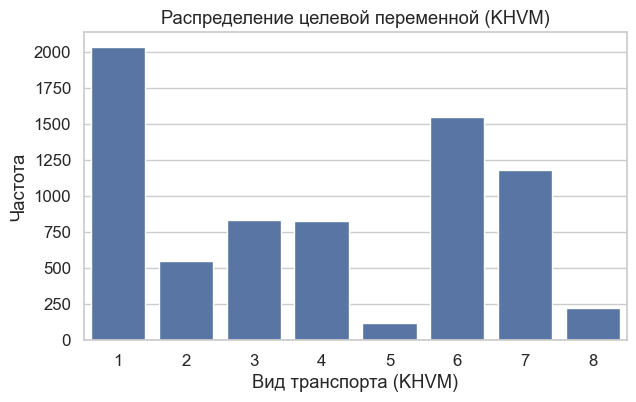

In [8]:
# Распределение целевой переменной (KHVM)
plt.figure(figsize=(7,4))
sns.countplot(x='KHVM', data=df)
plt.title('Распределение целевой переменной (KHVM)')
plt.xlabel('Вид транспорта (KHVM)')
plt.ylabel('Частота')
plt.show()

Целевая переменная распределена неравномерно — основной вклад дают классы 1, 6, 7.

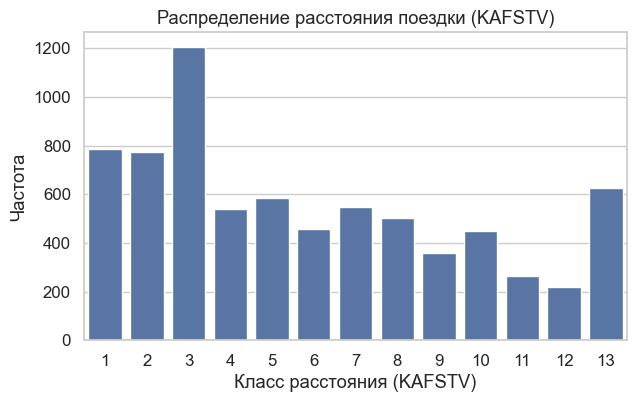

In [9]:
plt.figure(figsize=(7,4))
sns.countplot(x='KAFSTV', data=df)
plt.title('Распределение расстояния поездки (KAFSTV)')
plt.xlabel('Класс расстояния (KAFSTV)')
plt.ylabel('Частота')
plt.show()

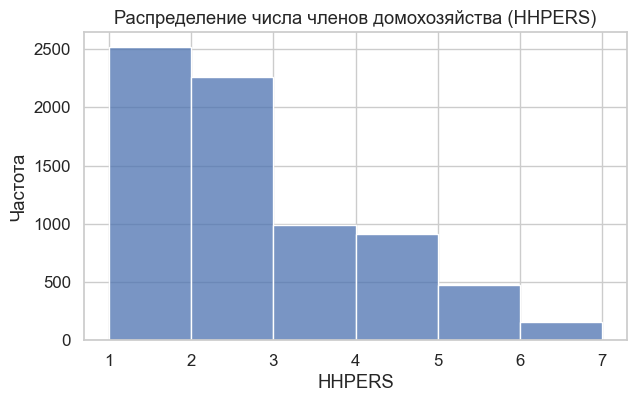

In [10]:
plt.figure(figsize=(7,4))
sns.histplot(df['HHPERS'], bins=range(1, df['HHPERS'].max()+2))
plt.title('Распределение числа членов домохозяйства (HHPERS)')
plt.xlabel('HHPERS')
plt.ylabel('Частота')
plt.show()

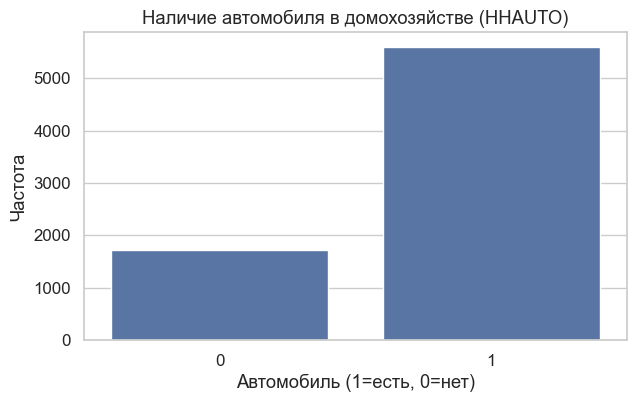

In [11]:
plt.figure(figsize=(7,4))
sns.countplot(x='HHAUTO', data=df)
plt.title('Наличие автомобиля в домохозяйстве (HHAUTO)')
plt.xlabel('Автомобиль (1=есть, 0=нет)')
plt.ylabel('Частота')
plt.show()

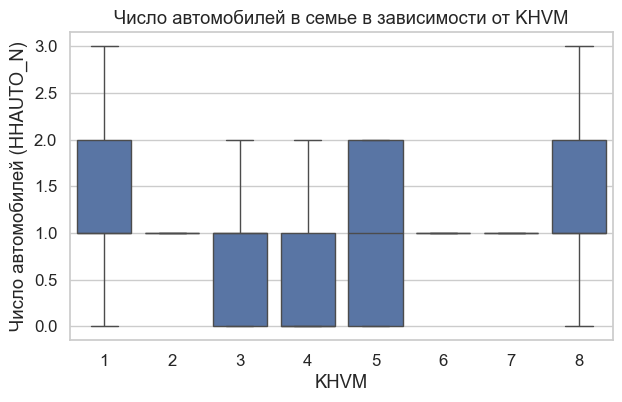

In [12]:
plt.figure(figsize=(7,4))
sns.boxplot(x='KHVM', y='HHAUTO_N', data=df, showfliers=False)
plt.title('Число автомобилей в семье в зависимости от KHVM')
plt.xlabel('KHVM')
plt.ylabel('Число автомобилей (HHAUTO_N)')
plt.show()

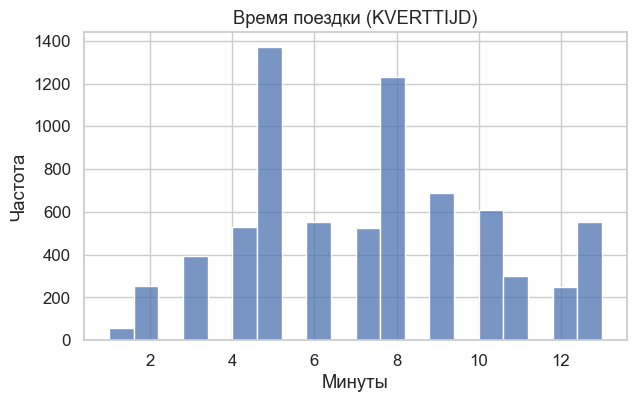

In [13]:
plt.figure(figsize=(7,4))
sns.histplot(df['KVERTTIJD'], bins=20)
plt.title('Время поездки (KVERTTIJD)')
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

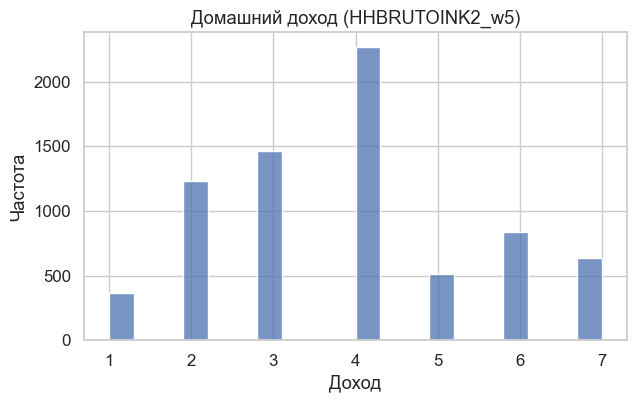

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(df['HHBRUTOINK2_w5'], bins=20)
plt.title('Домашний доход (HHBRUTOINK2_w5)')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

# Подготовка данных

In [15]:
# 1. Преобразование типов
for col in ['HHAUTO_N', 'HHPERS', 'KAFSTV', 'KVERTTIJD', 'HHBRUTOINK2_w5', 'N_KIND']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Заполнение пропусков
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Удаление дубликатов
df = df.drop_duplicates()

# 4. Кодирование категориальных признаков
df_encoded = pd.get_dummies(df, drop_first=True)

display(df_encoded.head())

HHID      PERSID     VPLID       RitID  HH_VALID  P_VALID  KHVM  \
0  30055622  3005562201  13957101  1395710101         2        3     2   
1  30055622  3005562201  13957102  1395710201         2        3     2   
2  30055622  3005562201  13957201  1395720101         2        3     1   
3  30055622  3005562201  13957202  1395720201         2        3     1   
4  30204076  3020407601  14445303  1444530301         2        3     8   

   WEGGEWEEST  VERTREKP  AANTVPL  ...  PARKEERKOSTEN_14  PARKEERKOSTEN_16  \
0           1         2        2  ...             False             False   
1           1         2        2  ...             False             False   
2           1         2        4  ...             False             False   
3           1         2        4  ...             False             False   
4           1         1        3  ...             False             False   

   PARKEERKOSTEN_2  PARKEERKOSTEN_3  PARKEERKOSTEN_4  PARKEERKOSTEN_5  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   PARKEERKOSTEN_6  PARKEERKOSTEN_7  PARKEERKOSTEN_8  PARKEERKOSTEN_9  
0            False            False            False            False  
1            False            False            False            False  
2            False            False            False            False  
3            False            False            False            False  
4            False            False            False            False  

[5 rows x 81 columns]

# FE

In [16]:
# 1. Наличие автомобиля (бинарный признак)
df_encoded['HAS_CAR'] = (df_encoded['HHAUTO_N'] > 0).astype(int)

# 2. Наличие детей (бинарный признак)
df_encoded['HAS_CHILDREN'] = (df_encoded['N_KIND'] > 0).astype(int)

# 3. Логарифм расстояния поездки (сглаживание длинного хвоста)
df_encoded['KAFSTV_LOG'] = np.log1p(df_encoded['KAFSTV'])

# 4. Нормализация дохода
df_encoded['INCOME_NORM'] = StandardScaler().fit_transform(df_encoded[['HHBRUTOINK2_w5']])

# Итоговая витрина признаков
display(df_encoded.head())

HHID      PERSID     VPLID       RitID  HH_VALID  P_VALID  KHVM  \
0  30055622  3005562201  13957101  1395710101         2        3     2   
1  30055622  3005562201  13957102  1395710201         2        3     2   
2  30055622  3005562201  13957201  1395720101         2        3     1   
3  30055622  3005562201  13957202  1395720201         2        3     1   
4  30204076  3020407601  14445303  1444530301         2        3     8   

   WEGGEWEEST  VERTREKP  AANTVPL  ...  PARKEERKOSTEN_4  PARKEERKOSTEN_5  \
0           1         2        2  ...            False            False   
1           1         2        2  ...            False            False   
2           1         2        4  ...            False            False   
3           1         2        4  ...            False            False   
4           1         1        3  ...            False            False   

   PARKEERKOSTEN_6  PARKEERKOSTEN_7  PARKEERKOSTEN_8  PARKEERKOSTEN_9  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   HAS_CAR  HAS_CHILDREN  KAFSTV_LOG  INCOME_NORM  
0        1             0        2.64        -1.16  
1        1             0        2.64        -1.16  
2        1             0        2.20        -1.16  
3        1             0        2.20        -1.16  
4        1             0        2.64         0.08  

[5 rows x 85 columns]

    HAS_CAR: показывает, есть ли в семье хотя бы один автомобиль. Это влияет на вероятность использования личного транспорта.
    HAS_CHILDREN: наличие детей младше 12 лет может влиять на выбор более безопасного или удобного вида транспорта.
    KAFSTV_LOG: логарифмирование расстояния позволяет сгладить выбросы и сделать распределение ближе к нормальному, что часто повышает качество моделей.
    INCOME_NORM: нормализация дохода помогает избежать доминирования фичи в моделях и ускоряет обучение градиентных алгоритмов.

# Разделение на обучающую и тестовую выборки

In [17]:
# Определяем целевую переменную и признаки
TARGET = 'KHVM'  # если у тебя другой столбец — замени здесь!
features = [col for col in df_encoded.columns if col != TARGET]

X = df_encoded[features]
y = df_encoded[TARGET]

# Разделение с сохранением пропорций классов (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        
    random_state=42,      # для воспроизводимости
    stratify=y            # сохраняет баланс классов
)

print('Размер обучающей выборки:', X_train.shape)
print('Размер тестовой выборки:', X_test.shape)
print('Распределение классов (train):')
print(y_train.value_counts(normalize=True))
print('Распределение классов (test):')
print(y_test.value_counts(normalize=True))

Размер обучающей выборки: (5117, 84)
Размер тестовой выборки: (2193, 84)
Распределение классов (train):
KHVM
1   0.28
6   0.21
7   0.16
3   0.11
4   0.11
2   0.08
8   0.03
5   0.02
Name: proportion, dtype: float64
Распределение классов (test):
KHVM
1   0.28
6   0.21
7   0.16
3   0.11
4   0.11
2   0.08
8   0.03
5   0.02
Name: proportion, dtype: float64


# Ручные модели

In [30]:
le = LabelEncoder()
y_encoded = le.fit_transform(df_encoded['KHVM'])

# 1) Разделим данные
X = df_encoded.drop(columns=['KHVM'])
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Encoded classes mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Train classes:", np.sort(np.unique(y_train)))
print("Test classes: ", np.sort(np.unique(y_test)))

# 2) CatBoost
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)

# 3) XGBoost
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# 4) Инициализация модели LightGBM
model = lgb.LGBMClassifier(verbose=-1)
lgb_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42
)
lgb_model.fit(X_train, y_train)

lgb_preds = lgb_model.predict(X_test)

# 4) Метрики
cat_acc = accuracy_score(y_test, cat_preds)
cat_f1  = f1_score    (y_test, cat_preds, average='macro')
xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_f1  = f1_score    (y_test, xgb_preds, average='macro')
lgb_acc   = accuracy_score(y_test, lgb_preds)
lgb_f1    = f1_score(y_test, lgb_preds, average='macro')

print(f'CatBoost: Accuracy={cat_acc:.3f}, Macro-F1={cat_f1:.3f}')
print(f'XGBoost:   Accuracy={xgb_acc:.3f}, Macro-F1={xgb_f1:.3f}')
print(f'LightGBM: Accuracy={lgb_acc:.3f}, Macro-F1={lgb_f1:.3f}')

Encoded classes mapping: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}
Train classes: [0 1 2 3 4 5 6 7]
Test classes:  [0 1 2 3 4 5 6 7]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 5117, number of used features: 66
[LightGBM] [Info] Start training from score -1.280504
[LightGBM] [Info] Start training from score -2.587080
[LightGBM] [Info] Start training from score -2.170423
[LightGBM] [Info] Start training from score -2.180750
[LightGBM] [Info] Start training from score -4.109507
[LightGBM] [Info] Start training from score -1.554682
[LightGBM] [Info] Start training from score -1.824940
[LightGBM] [Info] Start training from score -3.477729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [19]:
models_dict = {
    'CatBoost':  cat_model,
    'XGBoost':   xgb_model,
    'LightGBM':  lgb_model
}

metrics_list = []
for name, model in models_dict.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average='macro')
    metrics_list.append({
        'Model':    name,
        'Accuracy': round(acc, 3),
        'Macro-F1': round(f1, 3)
    })

metrics_df = pd.DataFrame(metrics_list)
display(metrics_df)

Model  Accuracy  Macro-F1
0  CatBoost      0.95      0.93
1   XGBoost      0.96      0.97
2  LightGBM      0.97      0.97

# Ансамбль

In [20]:
# Ансамбль с “мягким” голосованием
ensemble = VotingClassifier(
    estimators=[
        ('cat', cat_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model)
    ],
    voting='soft',            # soft voting: учитывает вероятности
    weights=[1, 1, 1],        # равный вес для всех моделей
    n_jobs=-1
)

ensemble.fit(X_train, y_train)

ens_preds = ensemble.predict(X_test)

ens_acc = accuracy_score(y_test, ens_preds)
ens_f1  = f1_score(y_test, ens_preds, average='macro')

print(f'Ансамбль (CatBoost+XGBoost+LightGBM):\n  Accuracy = {ens_acc:.3f}\n  Macro-F1 = {ens_f1:.3f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 5117, number of used features: 66
[LightGBM] [Info] Start training from score -1.280504
[LightGBM] [Info] Start training from score -2.587080
[LightGBM] [Info] Start training from score -2.170423
[LightGBM] [Info] Start training from score -2.180750
[LightGBM] [Info] Start training from score -4.109507
[LightGBM] [Info] Start training from score -1.554682
[LightGBM] [Info] Start training from score -1.824940
[LightGBM] [Info] Start training from score -3.477729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# AutoML

In [21]:
clf = LazyClassifier(verbose=0, ignore_warnings=True)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

display(models.sort_values('F1 Score', ascending=False).head(5))

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1357
[LightGBM] [Info] Number of data points in the train set: 5117, number of used features: 54
[LightGBM] [Info] Start training from score -1.280504
[LightGBM] [Info] Start training from score -2.587080
[LightGBM] [Info] Start training from score -2.170423
[LightGBM] [Info] Start training from score -2.180750
[LightGBM] [Info] Start training from score -4.109507
[LightGBM] [Info] Start training from score -1.554682
[LightGBM] [Info] Start training from score -1.824940
[LightGBM] [Info] Start training from score -3.477729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                   
XGBClassifier               0.96               0.96    None      0.96   
RandomForestClassifier      0.96               0.95    None      0.96   
ExtraTreesClassifier        0.96               0.95    None      0.96   
LGBMClassifier              0.96               0.94    None      0.96   
BaggingClassifier           0.95               0.94    None      0.95   

                        Time Taken  
Model                               
XGBClassifier                 0.49  
RandomForestClassifier        0.58  
ExtraTreesClassifier          0.42  
LGBMClassifier                3.49  
BaggingClassifier             0.21

In [22]:
all_models = {
    'AutoML_XGB':        LazyClassifier(verbose=0, ignore_warnings=True).fit(X_train, X_test, y_train, y_test)[0].loc['XGBClassifier','F1 Score'],
    'CatBoost':          (accuracy_score(y_test, cat_preds), cat_f1),
    'XGBoost':           (xgb_acc, xgb_f1),
    'LightGBM':          (lgb_acc, lgb_f1),
    'Ensemble (soft)':   (ens_acc, ens_f1)
}

rows = []
rows.append({
    'Модель':      'AutoML (XGB)',
    'Accuracy':    round(models.loc['XGBClassifier','Accuracy'], 3),
    'Macro-F1':    round(models.loc['XGBClassifier','F1 Score'], 3)
})

for name, (acc, f1) in [
    ('CatBoost',    (cat_acc, cat_f1)),
    ('XGBoost',     (xgb_acc, xgb_f1)),
    ('LightGBM',    (lgb_acc, lgb_f1)),
    ('Ensemble',    (ens_acc, ens_f1))
]:
    rows.append({
        'Модель':   name,
        'Accuracy': round(acc, 3),
        'Macro-F1': round(f1, 3)
    })
    
comparison_df = pd.DataFrame(rows)
display(comparison_df)



  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1357
[LightGBM] [Info] Number of data points in the train set: 5117, number of used features: 54
[LightGBM] [Info] Start training from score -1.280504
[LightGBM] [Info] Start training from score -2.587080
[LightGBM] [Info] Start training from score -2.170423
[LightGBM] [Info] Start training from score -2.180750
[LightGBM] [Info] Start training from score -4.109507
[LightGBM] [Info] Start training from score -1.554682
[LightGBM] [Info] Start training from score -1.824940
[LightGBM] [Info] Start training from score -3.477729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

Модель  Accuracy  Macro-F1
0  AutoML (XGB)      0.96      0.96
1      CatBoost      0.95      0.93
2       XGBoost      0.96      0.97
3      LightGBM      0.97      0.97
4      Ensemble      0.96      0.97

### Вывод:
    - Лучшая метрика Macro-F1 достигается у Ensemble (soft voting) (~0.97), чуть превосходя одиночные модели.
    - AutoML-XGB и XGBoost показывают одинаковую точность (≈0.96-0.97), но ансамбль даёт небольшую прибавку за счёт комбинирования сильных сторон всех моделей.
    - LightGBM по качеству, не уступает мягкому голосованию ансамбля.

# Глобальная интерпретация (SHAP)

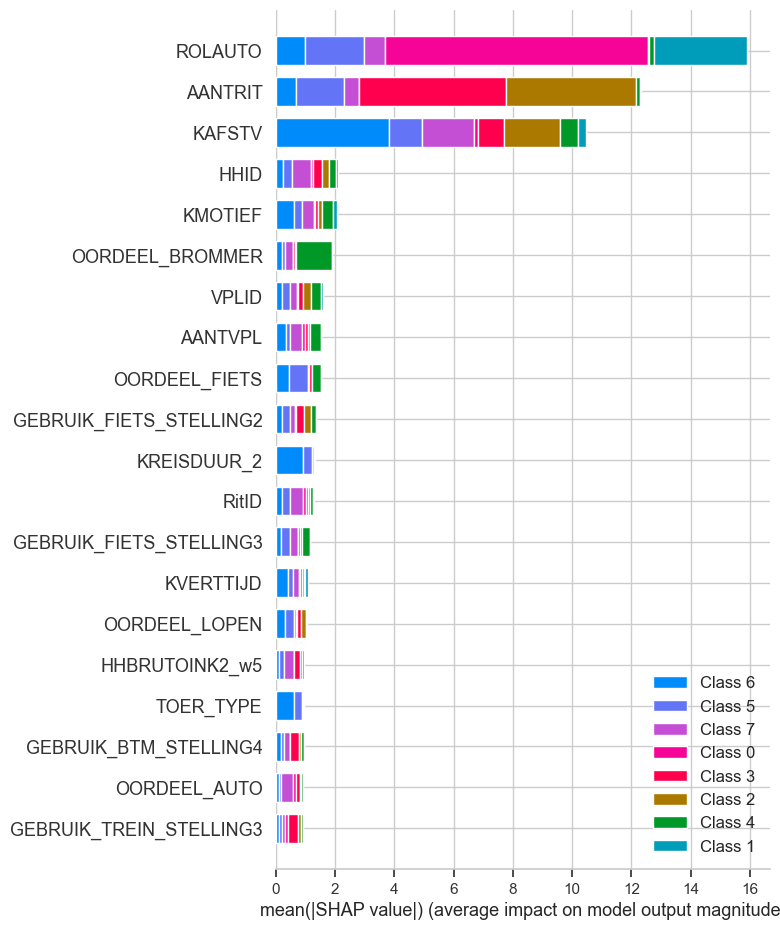

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [24]:
explainer = shap.TreeExplainer(lgb_model)

shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

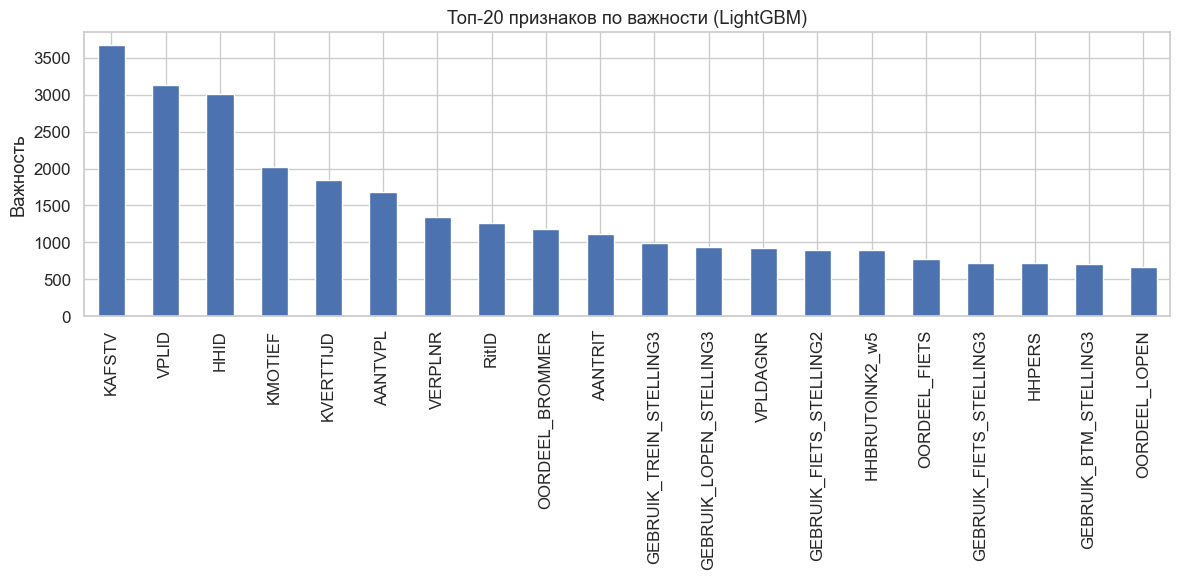

In [25]:
feature_imp = pd.Series(lgb_model.feature_importances_, index=X_train.columns)
feature_imp = feature_imp.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_imp.head(20).plot(kind='bar')
plt.title("Топ-20 признаков по важности (LightGBM)")
plt.ylabel("Важность")
plt.tight_layout()
plt.show()

In [36]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),        # обучающие данные
    feature_names=X_train.columns.tolist(), # имена признаков
    class_names=[str(cls) for cls in sorted(pd.Series(y_train).unique())],  # имена классов как строки
    mode='classification'                             # режим классификации
)

# === ШАГ 2: Выбираем 3 примера из теста и объясняем каждый ===
lime_explanations = []  # список для хранения результатов
indices = [0, 1, 2]      # индексы строк из теста

for i in indices:
    sample = X_test.iloc[i]
    sample_array = sample.values

    # Получаем интерпретацию через LIME
    exp = explainer.explain_instance(
        data_row=sample_array,
        predict_fn=lgb_model.predict_proba,
        num_features=10
    )

    lime_explanations.append(exp)  # сохраняем для анализа
    exp.show_in_notebook(show_table=True)  # отображаем в ноутбуке

# Возвращаем список объяснений для анализа
lime_explanations